In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

# 1️⃣ Folder berisi file Harry Potter .txt
folder_path = "D:/me!/College/SEMESTER 6/DIP/Tugas 1/archive/"

# Ambil semua file .txt di dalam folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]

# Dictionary untuk menyimpan hasil
all_books = {}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\an466\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# 2️⃣ Fungsi untuk membersihkan teks
def clean_text(text):
    # Hilangkan karakter newline dan carriage return
    text = text.replace("\n", " ").replace("\r", " ")

    # Hilangkan teks yang tidak diperlukan (misal: "Chapter 1", "Page 23", dll.)
    text = re.sub(r"\b(chapter|page|book)\s*\d*\b", "", text, flags=re.IGNORECASE)

    # Hilangkan karakter spesial kecuali [. ! ?]
    text = re.sub(r"[^a-zA-Z0-9.!? ]", "", text)

    # Tambahkan spasi sebelum karakter spesial [. ! ?]
    text = re.sub(r"([.!?])", r" \1", text)

    # Perbaiki kata yang memiliki karakter [. ! ?] di tempat yang tidak sesuai
    text = re.sub(r"\s+([.!?])", r" \1", text)  # Jika ada spasi sebelum karakter
    text = re.sub(r"([.!?])\s+", r"\1 ", text)  # Jika ada spasi setelah karakter

    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()

    return text
print(f"✅ {len(all_books)} file Harry Potter sudah di proses sesuai aturan!")

✅ 7 file Harry Potter sudah di proses sesuai aturan!


In [ ]:
# 3️⃣ Proses setiap file dan simpan hasilnya
for file in txt_files:
    with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
        content = f.read()

    # Bersihkan teks
    cleaned_text = clean_text(content)

    # Simpan hasilnya dalam dictionary
    all_books[file] = cleaned_text

# Simpan ke file JSON
json_path = "harry_potter_books_cleaned.json"
with open(json_path, "w", encoding="utf-8") as json_file:
    json.dump(all_books, json_file, ensure_ascii=False, indent=4)

print(f"✅ {len(all_books)} file Harry Potter diproses dan disimpan dalam JSON!")

✅ 7 file Harry Potter diproses dan disimpan dalam JSON!


In [ ]:
# 4️⃣ 🔹 Membaca kembali JSON dan membuat DataFrame Pandas
with open(json_path, "r", encoding="utf-8") as json_file:
    books_data = json.load(json_file)

# Konversi ke DataFrame
df = pd.DataFrame(list(books_data.items()), columns=["Book", "Content"])


# Tampilkan DataFrame dalam bentuk tabel
display(df)

,Book,Content
0,01 Harry Potter and the Sorcerers Stone.txt,M r . and Mrs . Dursley of number four Privet ...
1,02 Harry Potter and the Chamber of Secrets.txt,Not for the first time an argument had broken ...
2,03 Harry Potter and the Prisoner of Azkaban.txt,Harry Potter was a highly unusual boy in many ...
3,04 Harry Potter and the Goblet of Fire.txt,The villagers of Little Hangleton still called...
4,05 Harry Potter and the Order of the Phoenix.txt,The hottest day of the summer so far was drawi...
5,06 Harry Potter and the Half-Blood Prince.txt,It was nearing midnight and the Prime Minister...
6,07 Harry Potter and the Deathly Hallows.txt,The two men appeared out of nowhere a few yard...


,Book,Word Count
0,01 Harry Potter and the Sorcerers Stone.txt,84148
1,02 Harry Potter and the Chamber of Secrets.txt,92059
2,03 Harry Potter and the Prisoner of Azkaban.txt,116094
3,04 Harry Potter and the Goblet of Fire.txt,205343
4,05 Harry Potter and the Order of the Phoenix.txt,276816
5,06 Harry Potter and the Half-Blood Prince.txt,183765
6,07 Harry Potter and the Deathly Hallows.txt,214313


C:\Users\an466\AppData\Local\Temp\ipykernel_9628\1989383809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word Count", y="Book", data=df, palette="Blues_r")


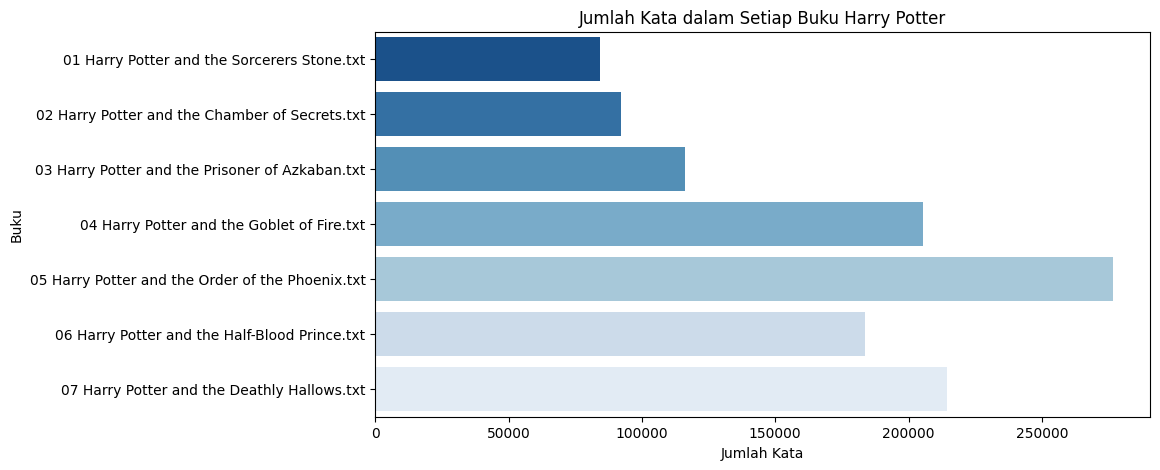

In [37]:
# 5️⃣ 🔹 Visualisasi jumlah kata per buku + Tampilkan tabel jumlah kata

# Tampilkan tabel jumlah kata
word_count_df = df[["Book", "Word Count"]]
display(word_count_df)  # Menampilkan tabel jumlah kata

# Grafik batang jumlah kata per buku
plt.figure(figsize=(10, 5))
sns.barplot(x="Word Count", y="Book", data=df, palette="Blues_r")
plt.xlabel("Jumlah Kata")
plt.ylabel("Buku")
plt.title("Jumlah Kata dalam Setiap Buku Harry Potter")
plt.show()


C:\Users\an466\AppData\Local\Temp\ipykernel_9628\3475259675.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentiment Score", y="Book", data=df, palette="coolwarm")


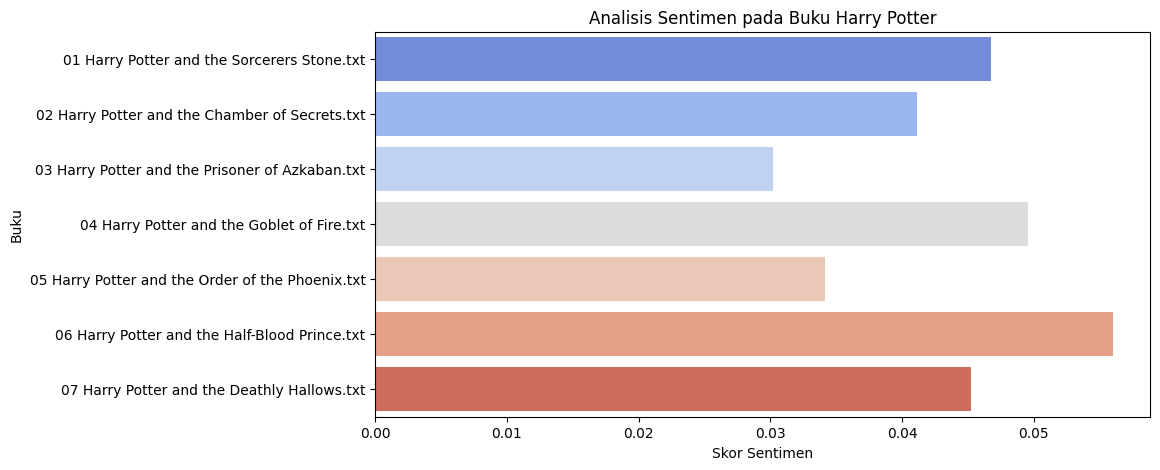

In [34]:
# 6️⃣ 🔹 Analisis Sentimen
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Skala -1 (negatif) hingga 1 (positif)

df["Sentiment Score"] = df["Content"].apply(analyze_sentiment)

# Visualisasi Sentimen
plt.figure(figsize=(10, 5))
sns.barplot(x="Sentiment Score", y="Book", data=df, palette="coolwarm")
plt.xlabel("Skor Sentimen")
plt.ylabel("Buku")
plt.title("Analisis Sentimen pada Buku Harry Potter")
plt.show()

In [35]:
# 7️⃣ 🔹 Analisis Kata yang Sering Muncul (Tanpa Word Cloud)
stop_words = set(stopwords.words("english"))

def get_most_common_words(text, n=20):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

# Hitung kata paling sering muncul di seluruh buku
all_text = " ".join(df["Content"])
most_common_words = get_most_common_words(all_text)

# Buat DataFrame untuk tabel kata yang sering muncul
word_freq_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

# Tampilkan tabel kata yang sering muncul
display(word_freq_df)

,Word,Frequency
0,harry,16940
1,said,14488
2,ron,5829
3,hermione,5005
4,back,3221
5,dumbledore,2885
6,could,2807
7,one,2548
8,like,2363
9,looked,2354
